### Introduction
This Project seeks to darw insight from road accidents that occured in QueenLand Between the Years 2000 to 2023.


Source: https://www.data.qld.gov.au/dataset/crash-data-from-queensland-road/resource/177dc50c-0cf7-46ba-8a69-99695aeaa46a

### Some Questions I seek to Answer.

- Which Year Recorded the Most Number of Accidents?
- Which Age Group/Gender Experienced the Most number of Accident?
- Which Means of Transportation Experienced the Most number of Accidents?
- How many males or females experienced the most number of accidents per road user type.?

### Importing Modules Necessary For Project

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading And Previewing Data

In [253]:
data = pd.read_csv("C:/Users/LENOVO/Downloads/_c_restraint_helmet_use.xls")
data.head()

,Crash_Year,Crash_PoliceRegion,Casualty_Severity,Casualty_AgeGroup,Casualty_Gender,Casualty_Road_User_Type,Casualty_Restraint_Helmet_Use,Casualty_Count
0,2001,Brisbane,Fatality,0 to 16,Female,Vehicle Occupant,Restrained,1
1,2001,Brisbane,Fatality,17 to 24,Female,Vehicle Occupant,Restrained,1
2,2001,Brisbane,Fatality,25 to 29,Female,Vehicle Occupant,Restraint Use Not determined,1
3,2001,Brisbane,Fatality,30 to 39,Female,Vehicle Occupant,Restraint Use Not determined,1
4,2001,Brisbane,Fatality,30 to 39,Female,Vehicle Occupant,Unrestrained,1


In [300]:
# summary statistics of numeric data
data.describe(include = 'all')

,Crash_Year,Crash_PoliceRegion,Casualty_Severity,Casualty_AgeGroup,Casualty_Gender,Casualty_Road_User_Type,Casualty_Restraint_Helmet_Use,Casualty_Count
count,39144.000000,39144,39144,39144,39144,39144,39144,39144.000000
unique,NaN,8,4,9,3,3,7,NaN
top,NaN,Brisbane,Hospitalised,17 to 24,Male,Vehicle Occupant,Helmet Worn,NaN
freq,NaN,6766,13438,6029,23066,24423,9918,NaN
mean,2011.586782,NaN,NaN,NaN,NaN,NaN,NaN,9.757817
std,6.588839,NaN,NaN,NaN,NaN,NaN,NaN,19.000293
min,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000


In [282]:
# summary of data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39144 entries, 0 to 39143
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash_Year                     39144 non-null  int64 
 1   Crash_PoliceRegion             39144 non-null  object
 2   Casualty_Severity              39144 non-null  object
 3   Casualty_AgeGroup              39144 non-null  object
 4   Casualty_Gender                39144 non-null  object
 5   Casualty_Road_User_Type        39144 non-null  object
 6   Casualty_Restraint_Helmet_Use  39144 non-null  object
 7   Casualty_Count                 39144 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [284]:
#duplicate rows
data.duplicated().sum()

0

### Filtering Out the Column "Vehicle Occupant" From the Entire Dataset

In [167]:
filtered_data = data[data['Casualty_Road_User_Type'] != 'Vehicle Occupant']


### Filter out 'Unknown' from the data

In [ ]:
filtered_data = filtered_data[filtered_data['Crash_PoliceRegion'] != 'Unknown']
filtered_data = filtered_data[filtered_data['Casualty_Severity'] != 'Unknown']
filtered_data = filtered_data[filtered_data['Casualty_AgeGroup'] != 'Unknown']
filtered_data = filtered_data[filtered_data['Casualty_Gender'] != 'Unknown']
filtered_data = filtered_data[filtered_data['Casualty_Road_User_Type'] != 'Unknown']
filtered_data = filtered_data[filtered_data['Casualty_Restraint_Helmet_Use'] != 'Unknown']
#filtered_data = filtered_data[filtered_data['Crash_PoliceRegion'] != 'Unknown']
#filtered_data = filtered_data[filtered_data['Crash_PoliceRegion'] != 'Unknown']

### Previewing the Loaded Data

In [169]:
filtered_data

,Crash_Year,Crash_PoliceRegion,Casualty_Severity,Casualty_AgeGroup,Casualty_Gender,Casualty_Road_User_Type,Casualty_Restraint_Helmet_Use,Casualty_Count
9,2001,Brisbane,Fatality,17 to 24,Male,Motorcyclist,Helmet Worn,2
12,2001,Brisbane,Fatality,25 to 29,Male,Bicyclist,Helmet Worn,1
13,2001,Brisbane,Fatality,25 to 29,Male,Motorcyclist,Helmet Worn,1
16,2001,Brisbane,Fatality,30 to 39,Male,Motorcyclist,Helmet Worn,1
20,2001,Brisbane,Fatality,40 to 49,Male,Bicyclist,Helmet Worn,1
...,...,...,...,...,...,...,...,...
39126,2023,Southern,Minor injury,17 to 24,Male,Motorcyclist,Helmet Worn,2
39129,2023,Southern,Minor injury,25 to 29,Male,Motorcyclist,Helmet Worn,1
39133,2023,Southern,Minor injury,30 to 39,Male,Motorcyclist,Helmet Worn,1
39137,2023,Southern,Minor injury,50 to 59,Male,Motorcyclist,Helmet Worn,1


### Casualties Over the Years

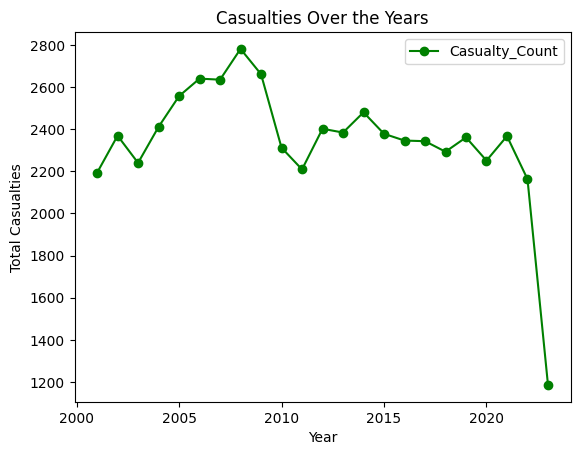

In [298]:
# Line graph for Casualties by year.

yearly_counts = filtered_data.groupby('Crash_Year')['Casualty_Count'].sum()
#plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='line', marker='o', color = 'green')
plt.title('Casualties Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Casualties')
plt.legend()
plt.show()

### Distribution of Casualties per Age Group.

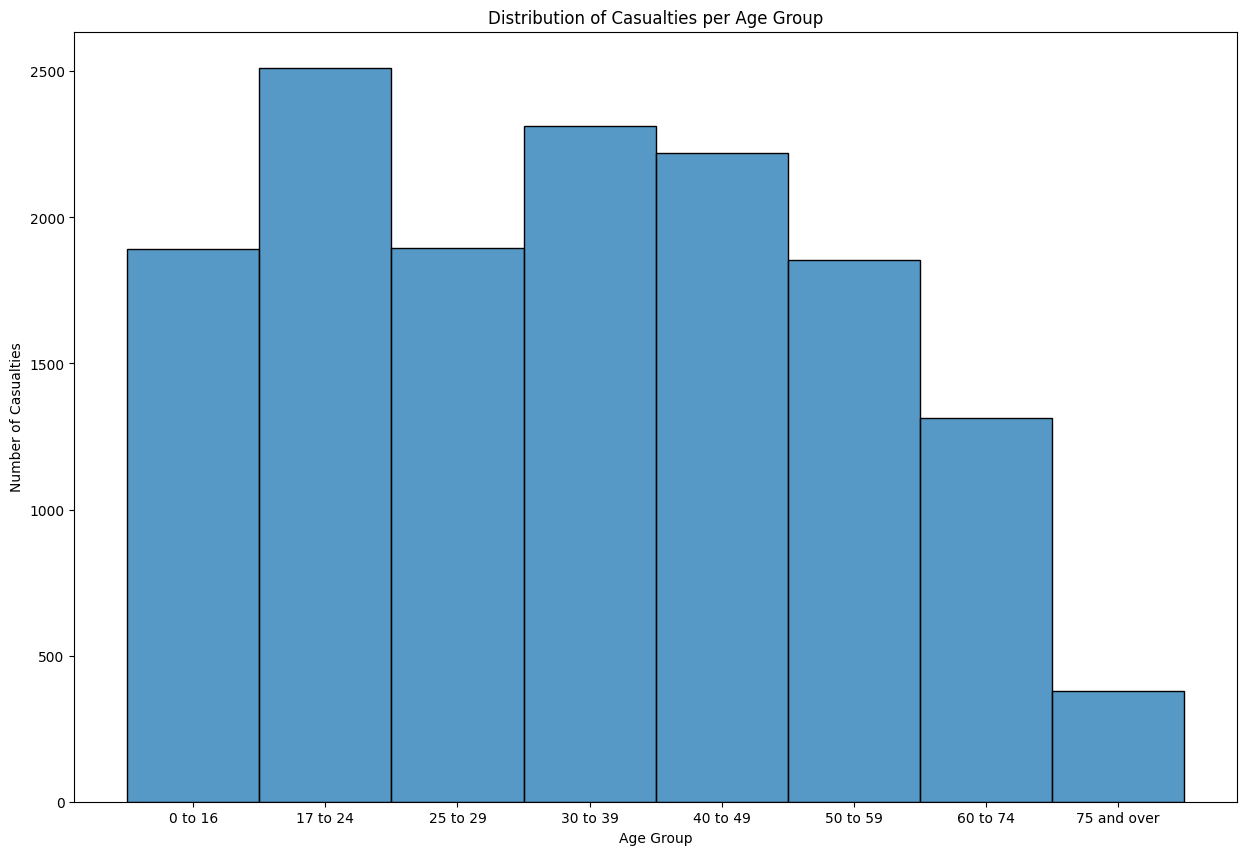

In [302]:
plt.figure(figsize=(15,10))
#sns.countplot(x = 'Casualty_AgeGroup', data = data)
sns.histplot(filtered_data['Casualty_AgeGroup'].sort_values(ascending=True), bins=10)
plt.title('Distribution of Casualties per Age Group')
plt.ylabel('Number of Casualties')
plt.xlabel('Age Group')
plt.show()

### Proportion of Casualties by Gender

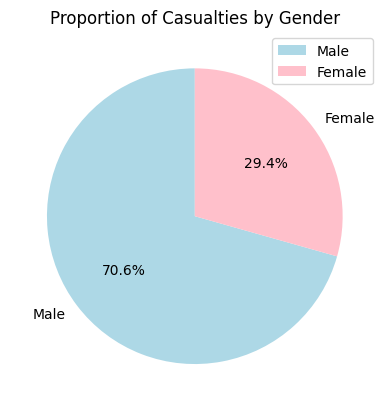

In [214]:
gender_counts = filtered_data['Casualty_Gender'].value_counts()
#plt.figure(figsize=(8, 8))
#gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink','green'])
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink','green'])
plt.title('Proportion of Casualties by Gender')
plt.legend(loc = 'upper right')
plt.show()

### Average Casualties per Region and Gender.

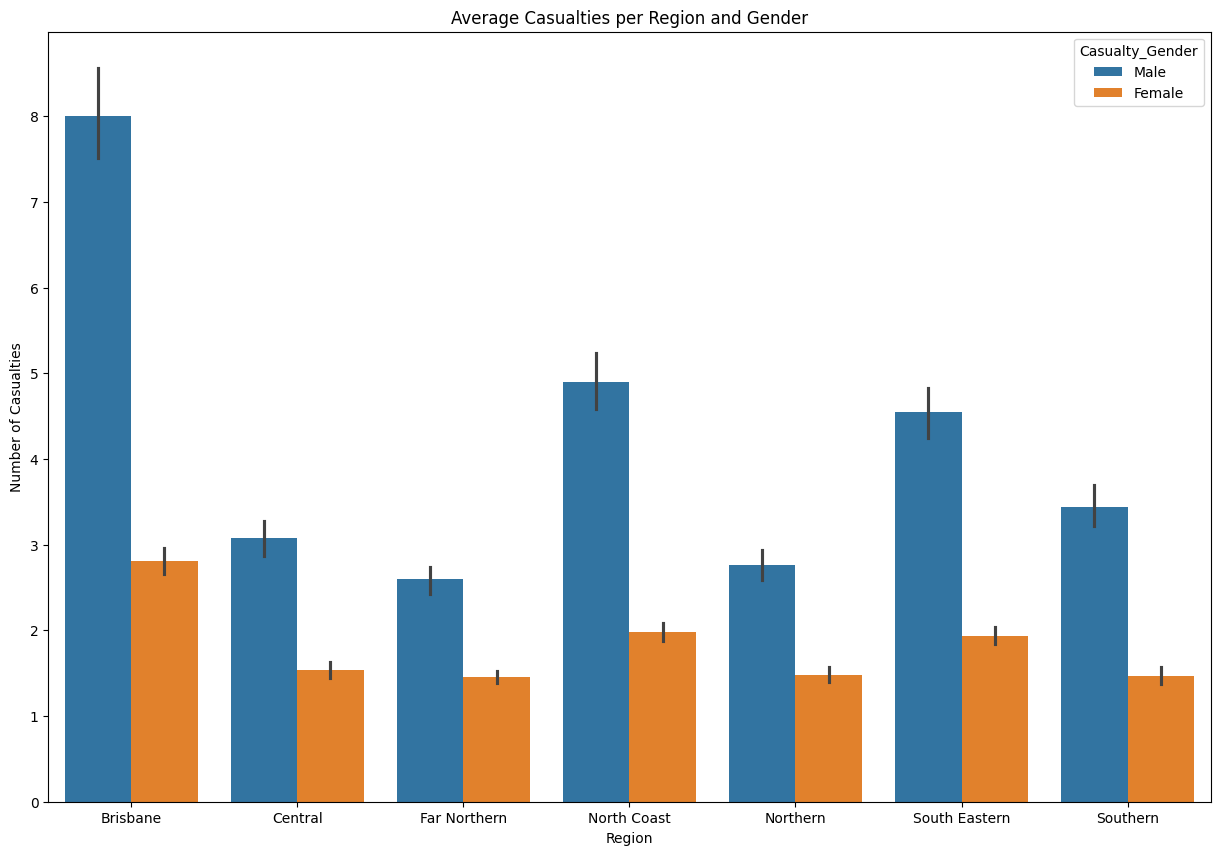

In [306]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Crash_PoliceRegion', y= 'Casualty_Count', hue = 'Casualty_Gender',data = filtered_data)
plt.title('Average Casualties per Region and Gender')
plt.ylabel('Number of Casualties')
plt.xlabel('Region')
plt.show()

### Casualty Severity Based on Region.

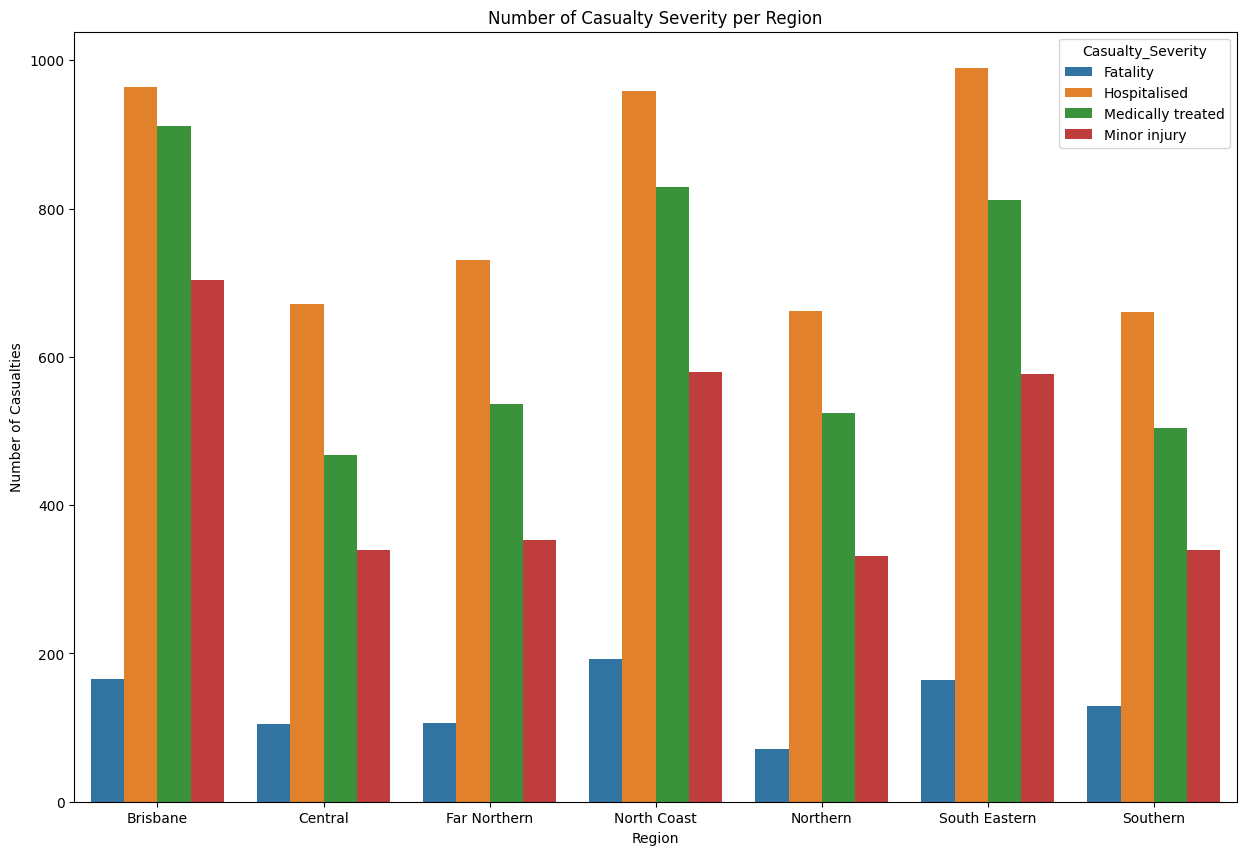

In [173]:
plt.figure(figsize=(15,10))


sns.countplot(x = 'Crash_PoliceRegion', hue = 'Casualty_Severity',data = filtered_data)
plt.title('Number of Casualty Severity per Region')
plt.ylabel('Number of Casualties')
plt.xlabel('Region')
plt.show()

### Region that Took Their Safety More Seriously.

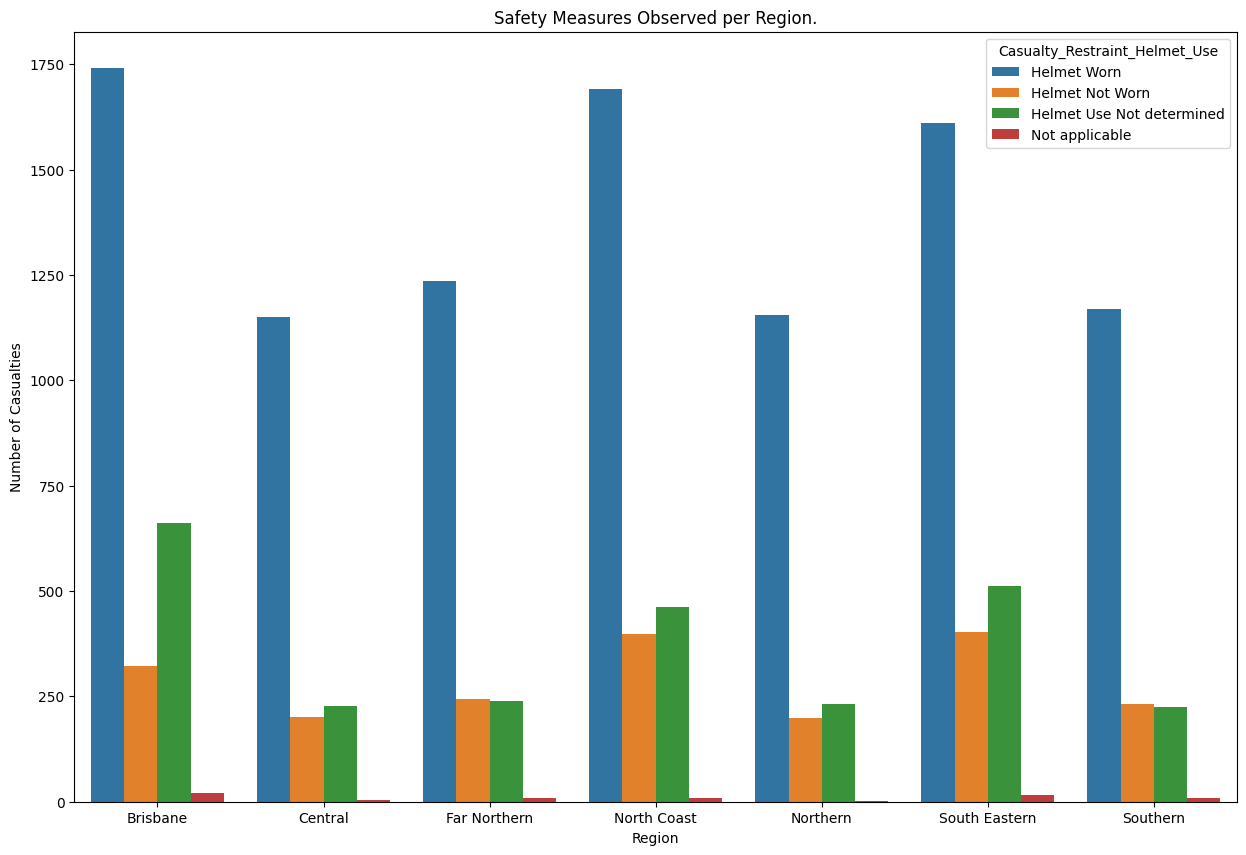

In [175]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Crash_PoliceRegion', hue = 'Casualty_Restraint_Helmet_Use',data = filtered_data)
plt.title('Safety Measures Observed per Region.')
plt.ylabel('Number of Casualties')
plt.xlabel('Region')
plt.show()

### Road User Type that Experienced the Most Accidents.

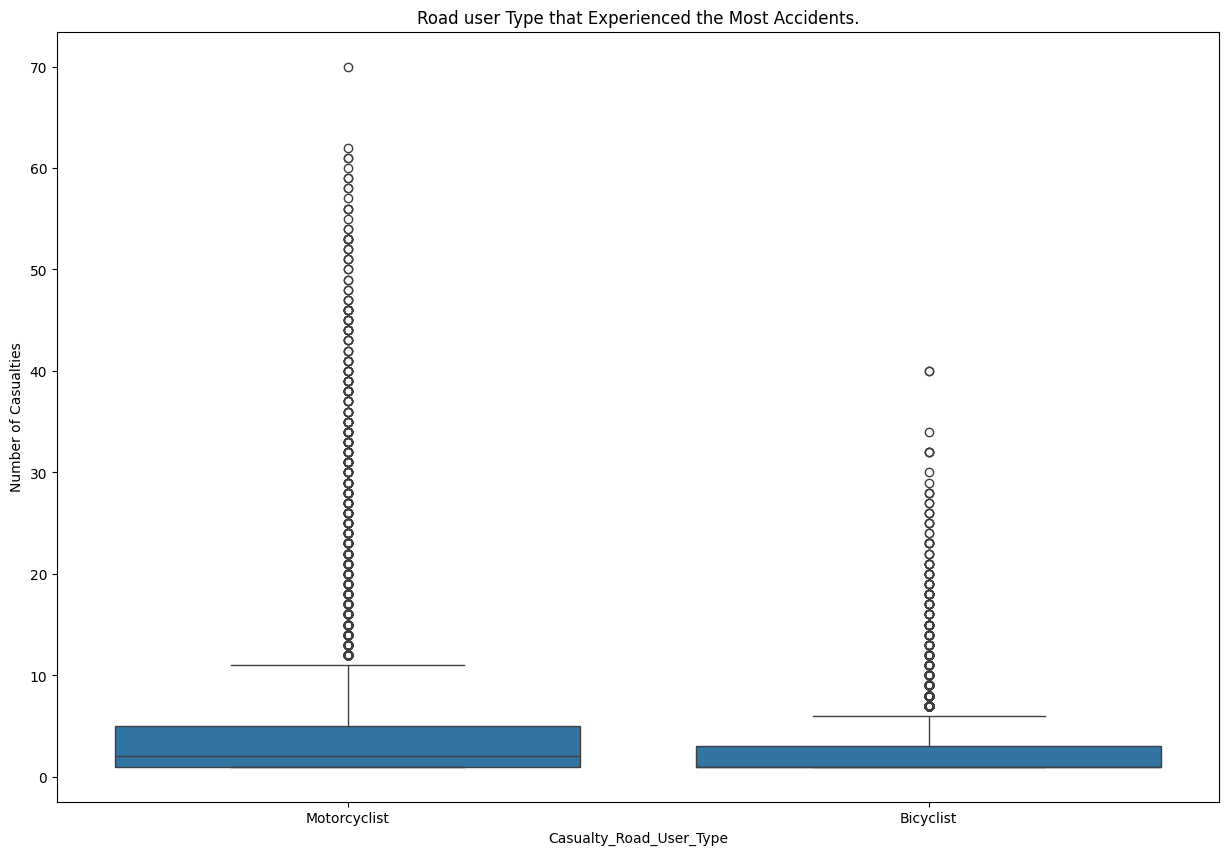

In [241]:
plt.figure(figsize=(15,10))
#sns.countplot(x = 'Casualty_AgeGroup', data = data)
sns.boxplot(x='Casualty_Road_User_Type', y = 'Casualty_Count', data=filtered_data)
plt.title('Road user Type that Experienced the Most Accidents.')
plt.ylabel('Number of Casualties')
plt.xlabel('Casualty_Road_User_Type')
plt.show()

### Road User Type that Experienced the Most Number of Accidents per Gender.

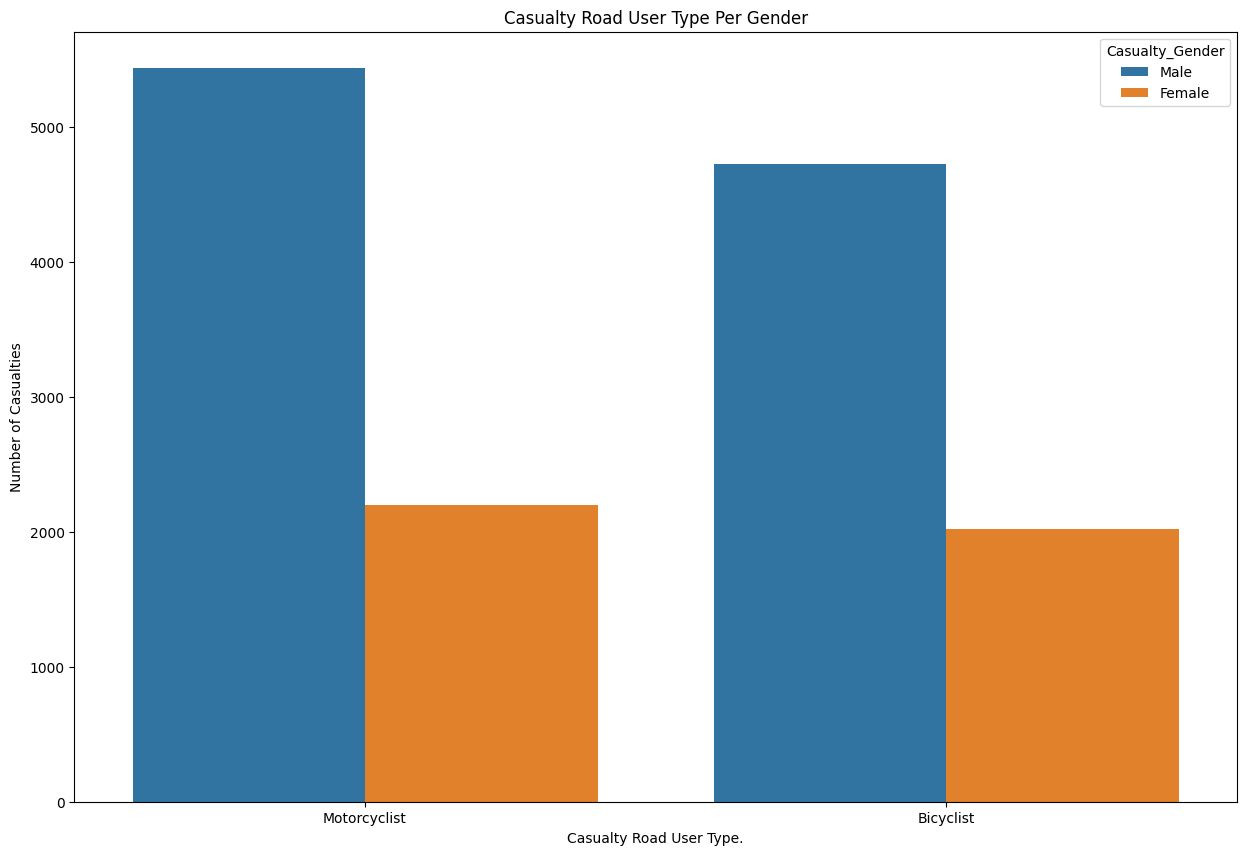

In [248]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Casualty_Road_User_Type', hue = 'Casualty_Gender', data = filtered_data)
#sns.boxplot(x='Casualty_Road_User_Type', y = 'Casualty_Count', data=filtered_data)
plt.title('Casualty Road User Type Per Gender')
plt.ylabel('Number of Casualties')
plt.xlabel('Casualty Road User Type.')
plt.show()

### Safety Measures Observed by Gender.

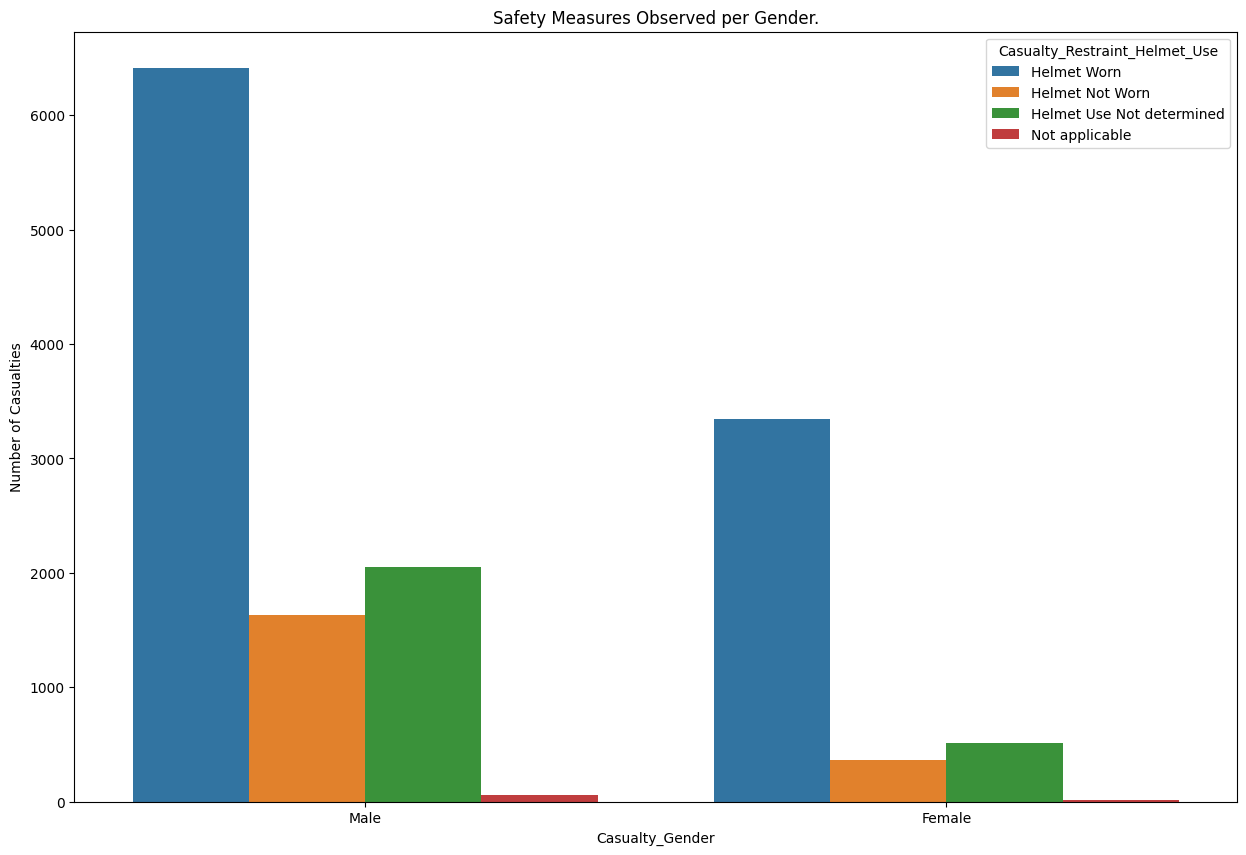

In [238]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Casualty_Gender', hue = 'Casualty_Restraint_Helmet_Use', data = filtered_data)
plt.title('Safety Measures Observed per Gender.')
plt.ylabel('Number of Casualties')
plt.show()

### Number of Casualties per Region and Gender.

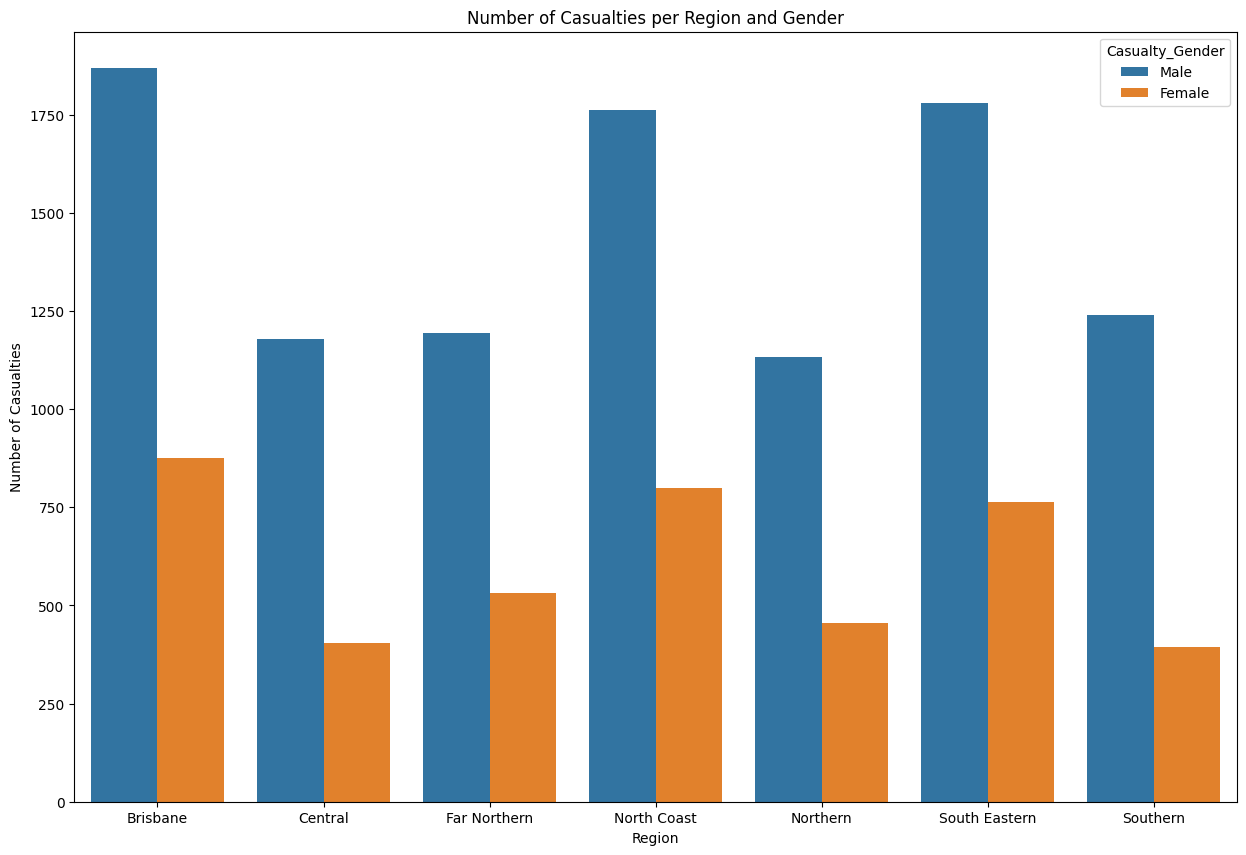

In [183]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Crash_PoliceRegion', hue = 'Casualty_Gender',data = filtered_data)
plt.title('Number of Casualties per Region and Gender')
plt.ylabel('Number of Casualties')
plt.xlabel('Region')
plt.show()

### Casualty Severity per Safety Measures.

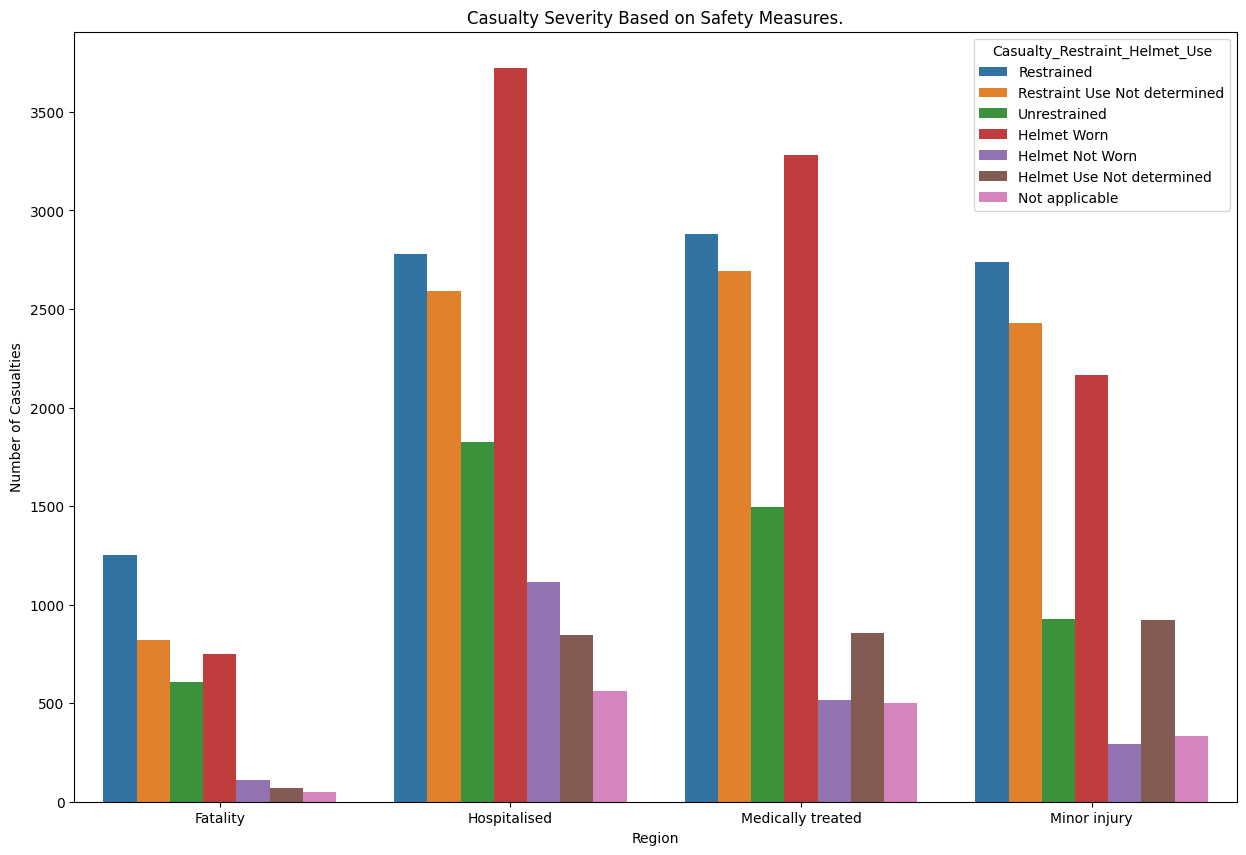

In [217]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Casualty_Severity', hue = 'Casualty_Restraint_Helmet_Use',data = data)
plt.title('Casualty Severity Based on Safety Measures.')
plt.ylabel('Number of Casualties')
plt.xlabel('Region')
plt.show()

### Insights on analysis.

1. 2007 was the year that experienced the most number of accidents.
2. People within the age ranges of 17-24 years experienced the most number of accidents.
3. Males experienced the most number of accidents.
4. Brisbane was the Police Region that recorded the most number of accidents. This is also the region that has people wearing helmets the most. Could this be as a result of recklessness? It may be.
5. Majority of those who experienced accidents were hospitalized.
6. Motor cyclist experienced more accidents as compared to bicyclists.
7. Most of the motor cyclists were males and tht of the bicyclists as well.
8. A large proportion of males wore helmets as compared to females.
9. Focusing on those who wore helmets, very few of them died as compared to thos Hospitalised, medically treated, and those who had minor injuries., most of them were hospitalized, second majority were medically treated, third majority had minor injuries.